In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'excel(%matplotlib.pyplot as plt)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [3]:
# dataset
disease_df=pd.read_csv("framingham.csv")
disease_df.drop(['education'],inplace=True,axis=1)
disease_df.rename(columns={'male':'gender_male'},inplace=True)
print(disease_df)

      gender_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0               1   39              0         0.0     0.0                0   
1               0   46              0         0.0     0.0                0   
2               1   48              1        20.0     0.0                0   
3               0   61              1        30.0     0.0                0   
4               0   46              1        23.0     0.0                0   
...           ...  ...            ...         ...     ...              ...   
4235            0   48              1        20.0     NaN                0   
4236            0   44              1        15.0     0.0                0   
4237            0   52              0         0.0     0.0                0   
4238            1   40              0         0.0     0.0                0   
4239            0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  hea

In [5]:
#Handeling null and missing values
#Managing missing values
disease_df.dropna(axis=0,inplace=True)
print(disease_df.head(),disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   gender_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0            1   39              0         0.0     0.0                0   
1            0   46              0         0.0     0.0                0   
2            1   48              1        20.0     0.0                0   
3            0   61              1        30.0     0.0                0   
4            0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3         

In [7]:
#Train & Test split data
X=np.asarray(disease_df[['age','gender_male','cigsPerDay','totChol','sysBP','glucose']])
y=np.asarray(disease_df['TenYearCHD'])
#normalization of the dataset
X=preprocessing.StandardScaler().fit(X).transform(X)
#Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
print('Train set:',X_train.shape,y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


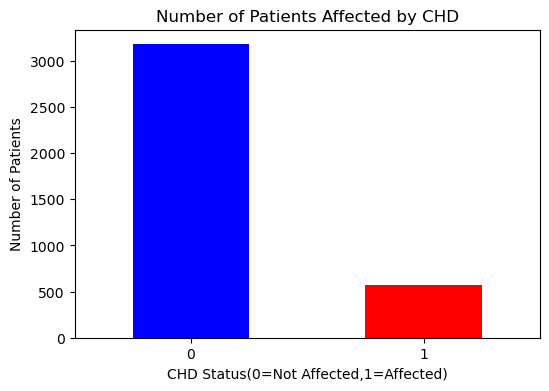

In [9]:
#Graphics Presentation
#Count the occurence of each category
chd_counts=disease_df['TenYearCHD'].value_counts()
#plot a bar chart
chd_counts.plot(kind='bar',color=['blue','red'],figsize=(6,4))
#Add labels and titles
plt.xlabel('CHD Status(0=Not Affected,1=Affected)')
plt.ylabel('Number of Patients')
plt.title('Number of Patients Affected by CHD')
plt.xticks(rotation=0)
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [13]:
#Getting Accuracy
#Evaluartion and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is=',accuracy_score(y_test,y_pred))

Accuracy of the model is= 0.8490230905861457


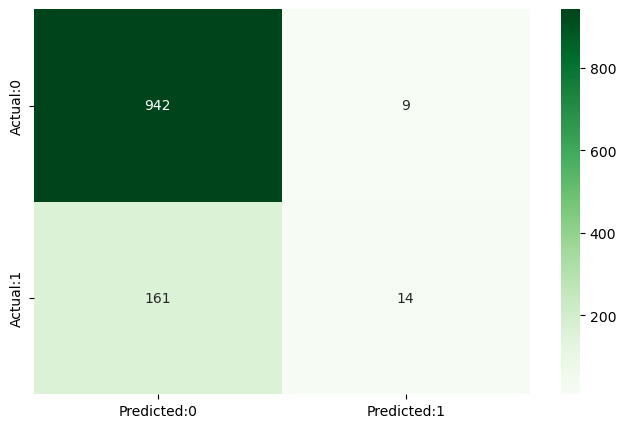

The details for confusion matrix is=
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [15]:
# Bulding a confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Greens')
plt.show()
print('The details for confusion matrix is=')
print(classification_report(y_test,y_pred))

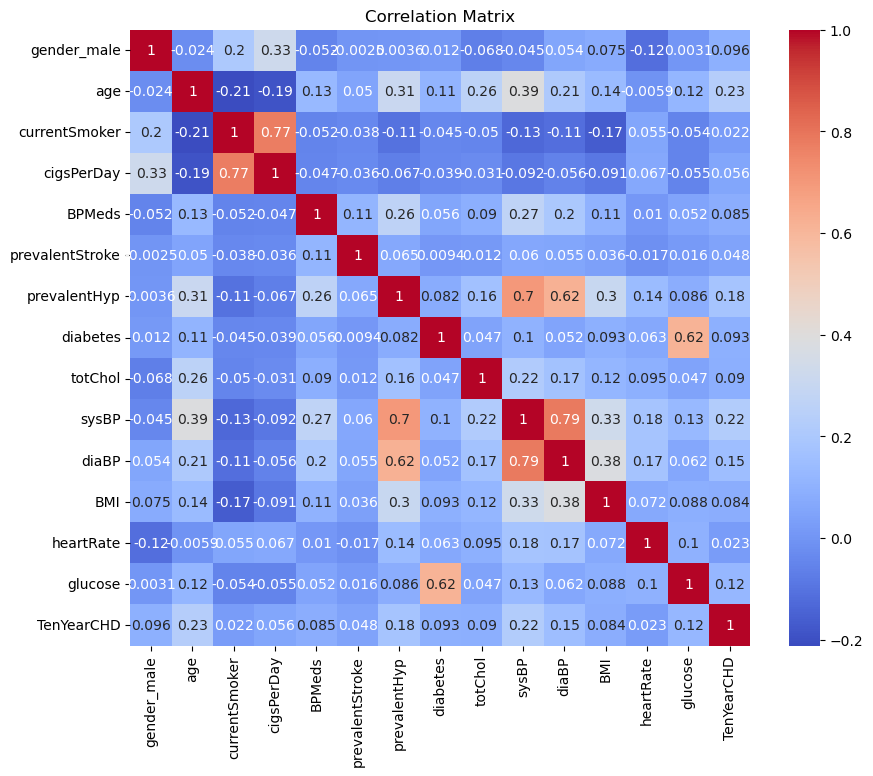

In [17]:
#heat map to visualize correlations features to understand their relationships & multicollinearity
correlation_matrix=disease_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

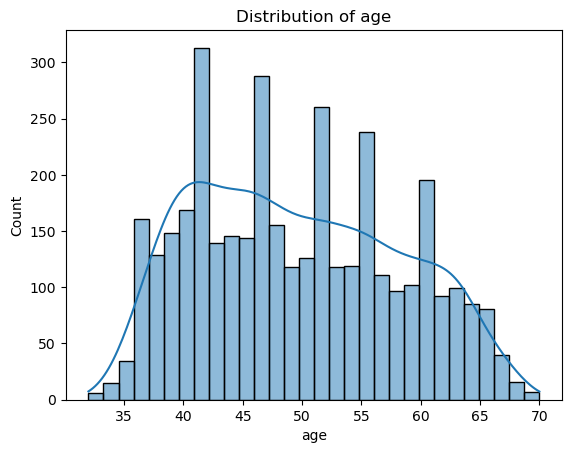

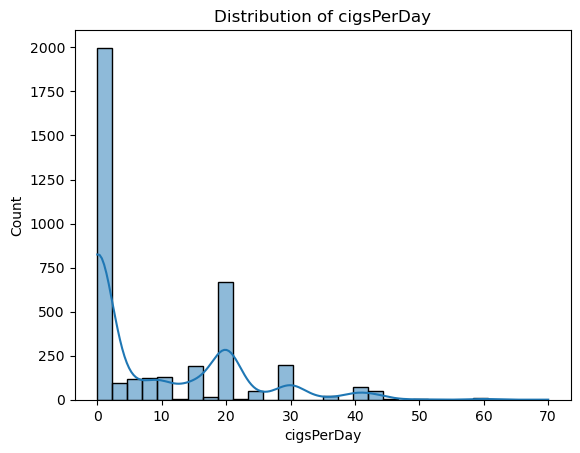

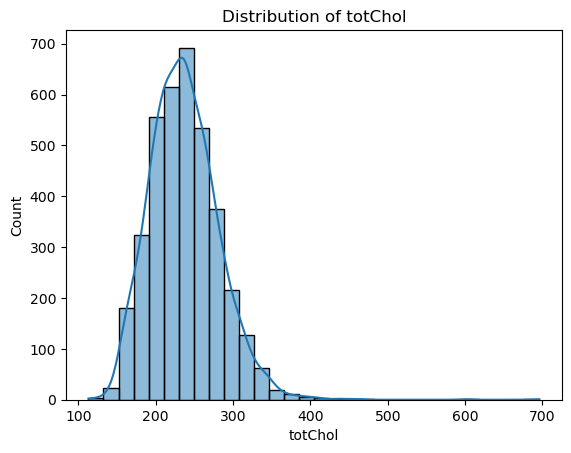

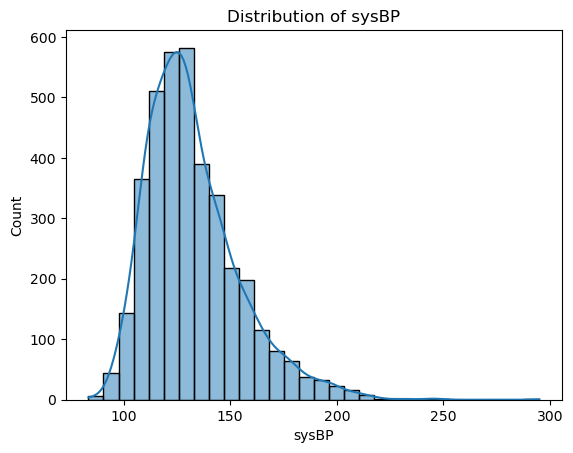

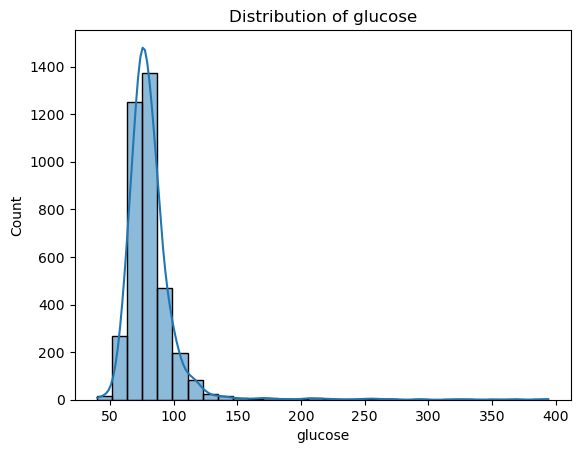

In [19]:
#visualize the distribution of features,especially the continues ones
continuous_features=['age','cigsPerDay','totChol','sysBP','glucose']
for feature in continuous_features:
    sns.histplot(disease_df[feature],kde=True,bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [21]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logreg,X,y,cv=5)
print("Cross-validation scores:",scores)
print("Average cross-validation score:",scores.mean())

Cross-validation scores: [0.84953395 0.85333333 0.84533333 0.856      0.848     ]
Average cross-validation score: 0.8504401242787395


In [23]:
#alternative model using Random Forest for classification
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_rf_pred=rf_model.predict(X_test)
print("Random Forest Accuracy:",accuracy_score(y_test,y_rf_pred))

Random Forest Accuracy: 0.8410301953818827


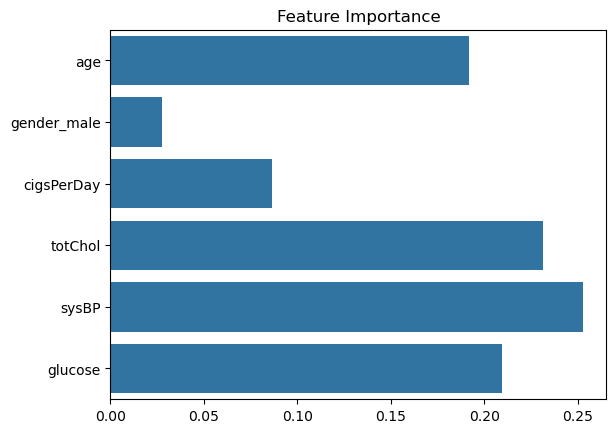

In [29]:
#Analyze which features are most important for predicting CHD
feature_importance=rf_model.feature_importances_
sns.barplot(x=feature_importance,y=['age','gender_male','cigsPerDay','totChol','sysBP','glucose'])
plt.title("Feature Importance")
plt.show()

In [27]:
#Save the trained model for later use
import joblib
joblib.dump(logreg,'logistic_regression_model.pkl')
print("Model saved successfully as 'logistic_regression_model.pkl'")

Model saved successfully as 'logistic_regression_model.pkl'


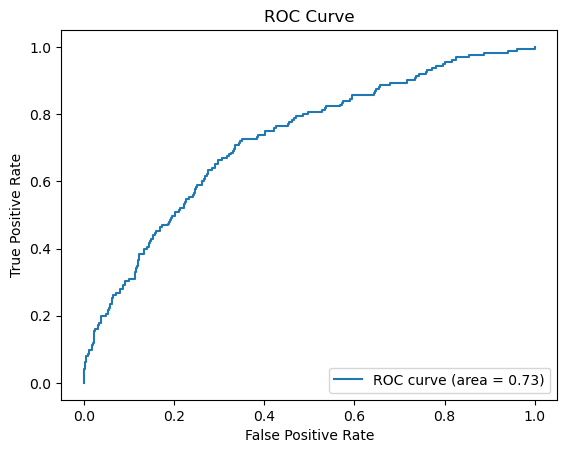

In [31]:
#ROC curve to understand the trade-off between sensitivity and specificity
from sklearn.metrics import roc_curve,auc
y_pred_prob=logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label="ROC curve (area = %0.2f)"% auc(fpr,tpr))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()